# Pythonによるデータ処理について

# 1.開発環境について

#### 1.Python3.10.11のダウンロード
- 下記のURLにアクセスする
```
https://www.python.org/downloads/windows/
```

- ページ内の「Python 3.10.11 - April 5, 2023」の「Download Windows installer (64-bit)」押下するとダウンロードされる。
![Alt text](./img/img11.png)

- または、下記のURLをクリックするとダウンロードされる。
```
https://www.python.org/ftp/python/3.10.11/python-3.10.11-amd64.exe
```

#### 【備考】
今回紹介するアプリにて、画像の機械学習で使用するultralyticsが最新版だとインストールされない事がある為、最新版ではなくPython3.10.11をインストールする事にした。


#### 最新版のダウンロードの場合
- 下記のURLにアクセスする
```
https://www.python.org/
```
- Download
  - Downlod for windowsの下の「Python3.xx.x」 を押下
  - ファイルがダウンロードされ、ダウンロード先のディレクトリに保存される

![Alt text](./img/img12.png)

#### 2.インストーラー起動
- ダウンロードされたインストーラーを起動

![Alt text](./img/img13.png)

- 「Setup was successful」と画面に表示されたら、インストール完了。「Close」を押下

![Alt text](./img/img14.png)

#### Python動作確認
- コマンドプロントを起動し、以下のコマンドを入力

```
python --version
```

![Alt text](./img/img15.png)
- 上記の様にバージョンが表示されたらダウンロード完了

# 2.VSCodeで環境を整える
VSCodeでの開発にあたり、以下の機能拡張を導入して下さい。

## Python
- Python言語のサポート機能

![Alt text](./img/img16.png)
<hr>

## Jupyter
- VSCode上でJupyter Notebookを開く事が可能

![Alt text](./img/img17.png)
<hr>


### 3.【実装例】VSCodeでipynbファイルを操作

- ライブラリについて

|ライブラリ|用途|
|:----|:----|
|pandas|データ解析を支援する機能を提供するライブラリ|
|numpy|数値計算を効率的に行うための拡張モジュール|
|matplotlib|NumPyのためのグラフ描画ライブラリ|
|japanize_matplotlib|グラフ描画を日本語に対応|
|openpyxl|Excelファイルを読み書きするためのライブラリ|


In [15]:
import warnings
warnings.filterwarnings('ignore')
## ライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import openpyxl

In [5]:
## データをリスト形式に格納する
data = [
    {"年度": "2014年", "金額(円)": 8006},
    {"年度": "2015年", "金額(円)": 8708},
    {"年度": "2016年", "金額(円)": 8908},
    {"年度": "2017年", "金額(円)": 9047},
    {"年度": "2018年", "金額(円)": 9670},
    {"年度": "2019年", "金額(円)": 9701},
    {"年度": "2020年", "金額(円)": 10113},
    {"年度": "2021年", "金額(円)": 10148},
    {"年度": "2022年", "金額(円)": 10847},
    {"年度": "2023年", "金額(円)": 11580}
]

## 作成したリストをpandasのデータフレームの形式に変換する
df = pd.DataFrame(data)
df

,年度,金額(円)
0,2014年,8006
1,2015年,8708
2,2016年,8908
3,2017年,9047
4,2018年,9670
5,2019年,9701
6,2020年,10113
7,2021年,10148
8,2022年,10847
9,2023年,11580


In [16]:
## 前年度比を計算し、「前年度比」のカラムを作成
df["前年度比"] = df["金額(円)"].diff()
# 最初の行の前年度比は0に設定
df["前年度比"].iloc[0] = 0  
df

,年度,金額(円),前年度比
0,2014年,8006,0.0
1,2015年,8708,702.0
2,2016年,8908,200.0
3,2017年,9047,139.0
4,2018年,9670,623.0
5,2019年,9701,31.0
6,2020年,10113,412.0
7,2021年,10148,35.0
8,2022年,10847,699.0
9,2023年,11580,733.0


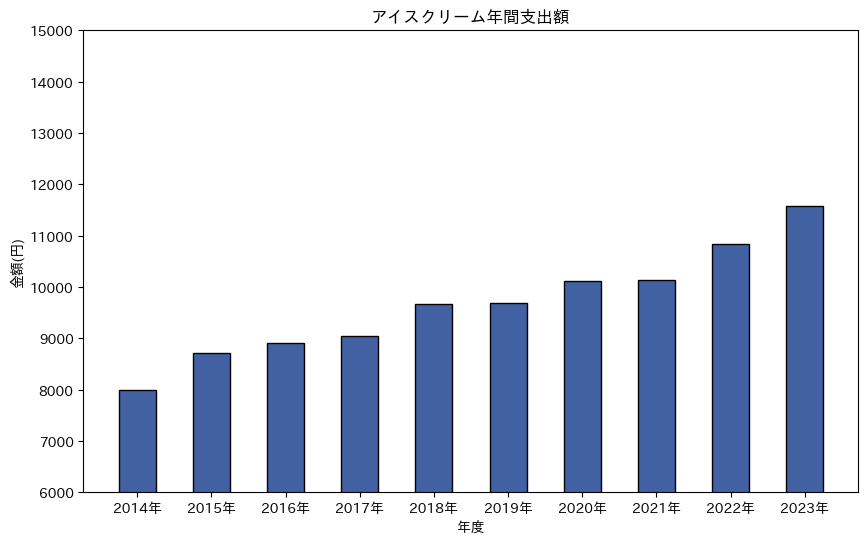

In [12]:
# データフレームから年度と金額の列を取得
years = df["年度"]
amounts = df["金額(円)"]

# 表の初期設定
## 表のサイズを設定
plt.figure(figsize=(10, 6))
'''
棒グラフの描画
第1引数：横軸（年度）
第2引数：縦軸(金額(円))
width：棒の太さ
color：棒の色
edgecolor:棒の外枠の色
'''
plt.bar(years, amounts, width=0.5,color="#4161A3", edgecolor="000")

# グラフのタイトルとラベル
plt.title('アイスクリーム年間支出額')
plt.xlabel('年度')
plt.ylabel('金額(円)')

# 縦軸の範囲を設定
plt.ylim(6000, 15000)

# png形式に保存
plt.savefig('../output/sample.png')

# 画面出力
plt.show()

In [8]:
## csv形式で出力
df.to_csv('../output/sample.csv',index=True,header=True)

In [10]:
## xlsx形式で出力
df.to_excel('../output/sample.xlsx',index=True,header=True)

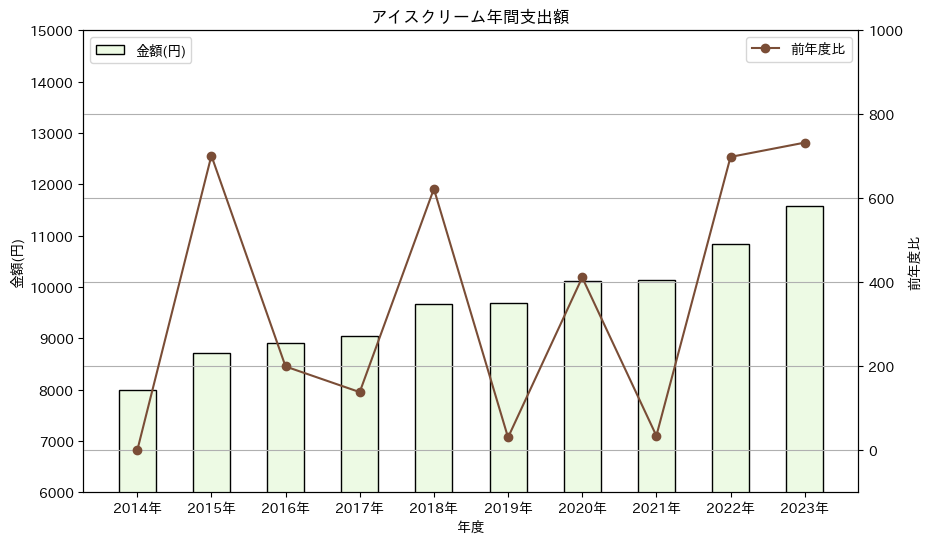

In [20]:
# データフレームから年度と金額の列を取得
years = df["年度"]
amounts = df["金額(円)"]
changes = df["前年度比"]

# 表の初期設定
## 表のサイズを設定
fig, ax1 = plt.subplots(figsize=(10, 6))

# 棒グラフを描画
ax1.bar(years, amounts, width=0.5,color="#EDFAE4", edgecolor="000", label='金額(円)')
ax1.set_xlabel('年度')
ax1.set_ylabel('金額(円)')
ax1.set_ylim(6000, 15000)

# 折れ線グラフを描画
'''
maker: 
'''
ax2 = ax1.twinx()
ax2.plot(years, changes, color='#7A4D36', marker='o', label='前年度比')
ax2.set_ylabel('前年度比')
ax2.set_ylim(-100, 1000)

# グラフのタイトルとラベル
plt.title('アイスクリーム年間支出額')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# グリッドを表示
plt.grid(True)

# 画面出力
plt.show()